In [3]:
import cv2
import numpy as np
import pytesseract
import PIL
import matplotlib.pyplot as plt
#The following path should be where you have installed tesseract-ocr
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'
%matplotlib inline

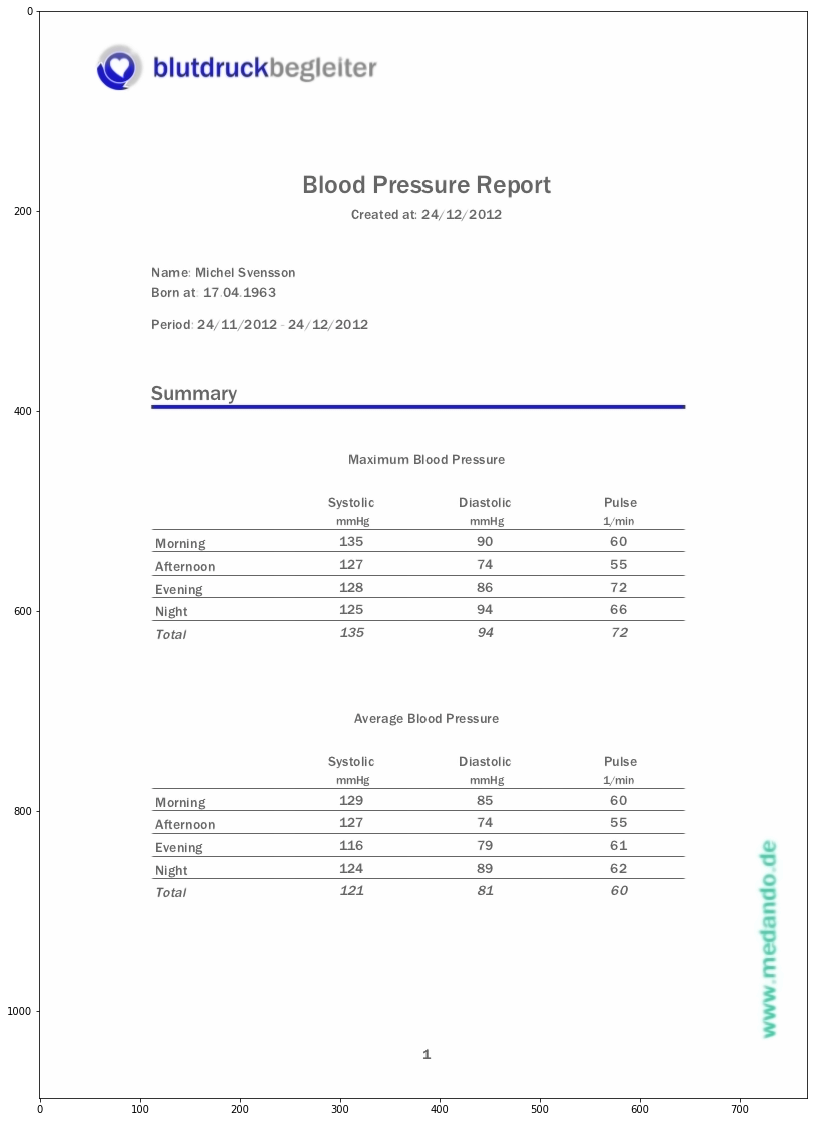

['Q blutdruckbegleiter',
 '',
 'Blood Pressure Report',
 '',
 'Created at: 24/12/2012',
 '',
 ' ',
 '',
 'Name: Michel Svensson',
 'Born at: 17.04.1963',
 '',
 'Period: 24/11/2012 - 24/12/2012',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 ' ',
 '',
 'Summary',
 'Maximum Blood Pressure',
 'systolic Diastolic Pulse',
 'mig mms ymin',
 'Morning 135 90 60',
 'Afternoon 127 74 55',
 'Evening 128 86 72',
 'Night 125 94 66',
 'Total 135 94 72',
 'Average Blood Pressure',
 'systolic Diastolic Pulse',
 'mig mig ymin',
 'Morning 129 85 60',
 'Afternoon 127 74 55',
 'Evening 116 79 61',
 'Night 124 89 62',
 'Total 124 84 60',
 '',
 'www.medando.de']

In [4]:
def process_image(img):
    return cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

#Extracting the text and calling the label function for a final res of labels
def extract_text(img):
    text = pytesseract.image_to_string(img)
    lst = text.split('\n')
    return lst
img = cv2.imread('12.jpg')
denoised_img = process_image(img)
plt.figure(figsize=(20,20))
plt.imshow(denoised_img)
plt.show()

full_text = extract_text(img)
full_text

In [7]:
report_dict = {}
target_word = 'Summary'
while True:
     
    tit_ind = full_text.index(target_word)+1
    title = full_text[tit_ind]
    print(title)
    try:
        index =  locate(full_text, 'Total')
        values = full_text[index][6:].split(' ')
        sub_titles = full_text[tit_ind+1].split(' ')
        units = full_text[tit_ind +2].split(' ')
        print(values)
        
        report_dict[title] = { sub_titles[i]: values[i]+" " + units[i] for i in range(len(values))}
        
        print(full_text[locate(full_text, 'Total')])
        full_text.insert(locate(full_text, 'Total'), 'Summary')
        full_text.pop(full_text.index(target_word))
        full_text.pop(locate(full_text, 'Total'))
    except Exception as e:
        print(e)
        break
report_dict


Maximum Blood Pressure
['135', '94', '72']
Total 135 94 72
Average Blood Pressure
['124', '84', '60']
Total 124 84 60

list indices must be integers or slices, not NoneType


{'Average Blood Pressure': {'Diastolic': '84 mig',
  'Pulse': '60 ymin',
  'systolic': '124 mig'},
 'Maximum Blood Pressure': {'Diastolic': '94 mms',
  'Pulse': '72 ymin',
  'systolic': '135 mig'}}

In [6]:
def locate(lst, word):
    for i, t in enumerate(lst):
        if word in t:
            return i
    return None

#better results but still not full performance, shall we download 5.0? OK SEND ME THE LINK

In [16]:
def main_rep(img_path = "12.jpg"):
    
    def process_image(img):
        """denoising the image using opencv for better accuracy
            You can check the function documentation for further
            details about the all the arguments provided.
                                                            """
        return cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    
    def extract_text(img):
        """
        extracting text from an image using pytesseract and splitting it according
        to line breaks.
        """
        text = pytesseract.image_to_string(img)
        lst = text.split('\n')
        return lst
        
    def locate(lst, word):
        """ this function is simply used to determine a part of a string inside of a list of strings 
        and returns the index where it was found first.
        """
        for i, t in enumerate(lst):
            if word in t:
                return i
        return None
    
    def extract_rep(text):
        """ this is the algorithm used specifically for the 12.jpg structure.
        It will not work with other types. However, following the steps here.
        You can create for each type his own custom algorithm thats works ideally with.
        The approach here is to find a target word which its location will be changed
        once a one loop is done. The target word is 'Summary', beneath it will be a title
        and beneath that is sub titles used as in the componenets and beneath that is the unit
        then we search for the word total and we split the values in that line for each component
        and we append all that into a nested dictionary.
        
        Once you fully understand everything that is happening, your homework would be making a similar algorithm for
        the type of cbc test reports in the image attached. Good Luck.
        """
        report_dict = {}
        target_word = 'Summary'
        while True:

            tit_ind = text.index(target_word)+1
            title = text[tit_ind]
            
            try:
                index =  locate(text, 'Total')
                values = text[index][6:].split(' ')
                sub_titles = text[tit_ind+1].split(' ')
                units = text[tit_ind +2].split(' ')
                print(values)

                report_dict[title] = { sub_titles[i]: values[i]+" " + units[i] for i in range(len(values))}

                print(text[locate(text, 'Total')])
                text.insert(locate(text, 'Total'), 'Summary')
                text.pop(text.index(target_word))
                text.pop(locate(text, 'Total'))
            except Exception as e:
                
                break
        return report_dict
    #grabbing the img from the image path and denoising it for better accuracy
    img = cv2.imread(img_path)
    denoised_img = process_image(img)
    
    #grabbing the full text in the image then using an algorithm specified for the 12.jpg report type
    text = extract_text(img)
    
    report_dict = extract_rep(text)
    
    return report_dict
    
dict_rep = main_rep()
dict_rep

['135', '94', '72']
Total 135 94 72
['124', '84', '60']
Total 124 84 60


{'Average Blood Pressure': {'Diastolic': '84 mig',
  'Pulse': '60 ymin',
  'systolic': '124 mig'},
 'Maximum Blood Pressure': {'Diastolic': '94 mms',
  'Pulse': '72 ymin',
  'systolic': '135 mig'}}